Train a chaotic recurrent neural net to replicate an output. A chaotic RNN is initialized with a null output projection vector. It is then trained to reproduce a regular sequence. Once trained, the network will continue to replicate this sequence.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import chaotic_rnn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Show an example of one of the underlying neurons prior to training.

In [36]:
crnn = chaotic_rnn.ChaoticRnn(250, .1)
crnn.init_state()

Text(0.5, 1.0, 'Free running neuron')

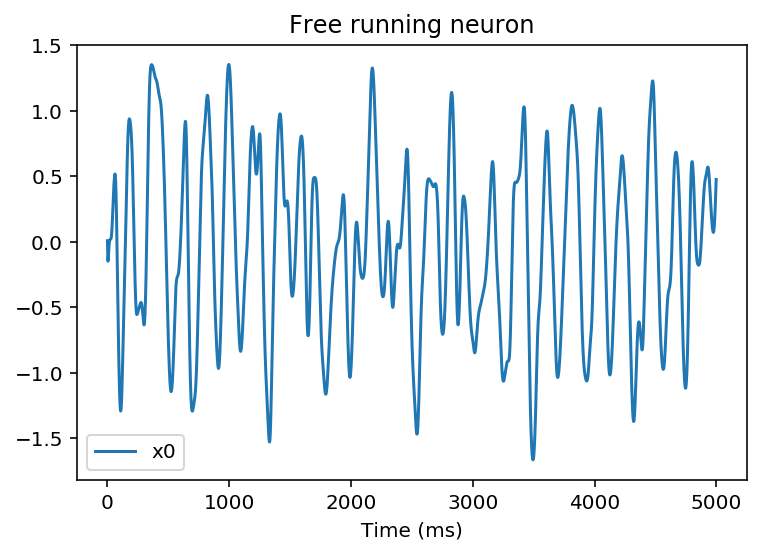

In [37]:
D = []
for i in range(5000):
    D.append({'t': i,
              'z': crnn.z,
              'x0': crnn.x[0]})
    crnn.forward()
df = pd.DataFrame(D)
ax = plt.gca()
df.plot('t', 'x0', ax=ax)
plt.xlabel('Time (ms)')
plt.title('Free running neuron')

Train this network with this sequence.

Text(0.5, 0, 'Time (s)')

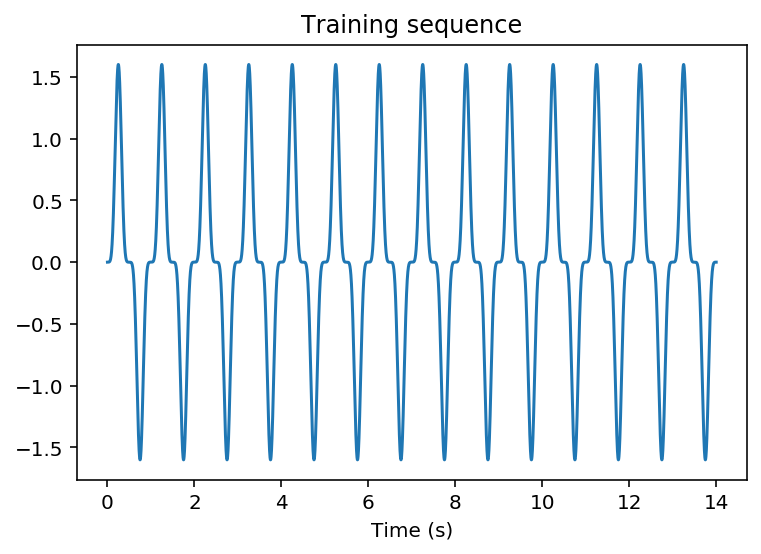

In [38]:
# Create one long training sequence.
t = np.arange((14000)) / 1000.0
y = np.sin(t * 2 * np.pi) - .5 * np.sin(t * 2 * np.pi * 3) + .1 * np.sin(t * 2 * np.pi * 5)
plt.plot(t, y)
plt.title("Training sequence")
plt.xlabel('Time (s)')

Text(0.5, 1.0, 'Forced output')

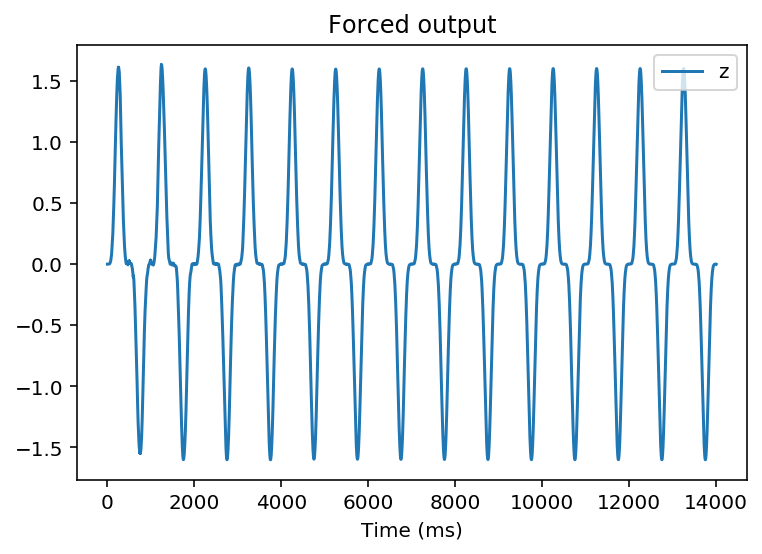

In [39]:
results = crnn.train(y, learn_every=2)
ax = plt.gca()
results.plot('t', 'z', ax=ax)
plt.xlabel('Time (ms)')
plt.title('Forced output')

Now check that the network continues to generate this output by itself. Also show the hidden state of neuron 0.

Text(0.5, 1.0, 'Free running output')

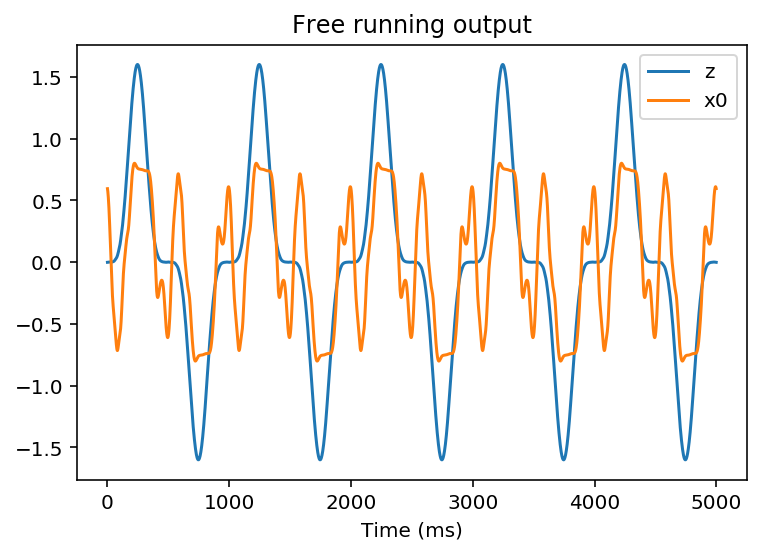

In [45]:
D = []
for i in range(5000):
    D.append({'t': i,
              'z': crnn.z,
              'x0': crnn.x[0].copy()})
    crnn.forward()
df = pd.DataFrame(D)
ax = plt.gca()
df.plot('t', 'z', ax=ax)
df.plot('t', 'x0', ax=ax)
plt.xlabel('Time (ms)')
plt.title('Free running output')